In [1]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [2]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID
from src.sport_analytics.model.eval import create_polar_plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Import your group to analyze

In [16]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 65 and overall <90
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

# Seiten wurden umgestellt und Feld hat jetzt neuen Inhalt
df_prospect['Position'] = [value.strip() for item in df_prospect["Position"] for value in item.split(',')]
df_prospect['Position'] = [i.replace(' ',',') for i in df_prospect['Position']]

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,22.0,238794,Vini Jr.,22.0,https://cdn.sofifa.net/players/238/794/24_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,89.0,94,Real Madrid,...,25.0,18.0,5.0,7.0,7.0,7.0,10.0,2024,79.0,32.0
1,20.0,256790,J. Musiala,20.0,https://cdn.sofifa.net/players/256/790/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,93,FC Bayern München,...,63.0,68.0,6.0,9.0,8.0,8.0,11.0,2024,84.0,64.0
2,20.0,251854,Pedri,20.0,https://cdn.sofifa.net/players/251/854/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,86.0,92,FC Barcelona,...,77.0,65.0,12.0,7.0,11.0,8.0,8.0,2024,87.0,68.0
3,22.0,247635,K. Kvaratskhelia,22.0,https://cdn.sofifa.net/players/247/635/24_60.png,Georgia,https://cdn.sofifa.net/flags/ge.png,86.0,92,Napoli,...,39.0,34.0,9.0,15.0,8.0,14.0,8.0,2024,82.0,38.0
4,20.0,256630,F. Wirtz,20.0,https://cdn.sofifa.net/players/256/630/24_60.png,Germany,https://cdn.sofifa.net/flags/de.png,86.0,91,Bayer 04 Leverkusen,...,57.0,44.0,14.0,14.0,13.0,6.0,10.0,2024,83.0,59.0


In [ ]:
sum(df_prospect.ID == 259399)

In [17]:
df_prospect.Positioning

0       87.0
1       81.0
2       79.0
3       84.0
4       80.0
        ... 
5438    53.0
5439    46.0
5440    52.0
5441    49.0
5442    53.0
Name: Positioning, Length: 5443, dtype: float64

## Choose a from a Set of trained models

In [21]:
import pickle

with open("./data/sport_analytics/model/offense_potential_forward.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.93      0.93      0.93        54
        True       0.20      0.20      0.20         5

    accuracy                           0.86        59
   macro avg       0.56      0.56      0.56        59
weighted avg       0.86      0.86      0.86        59



# Analyze individual Players

pred [81.64665726]
[(259399, 'R. Højlund', 2024)]


100%|██████████| 1/1 [00:00<00:00, 39.66it/s]


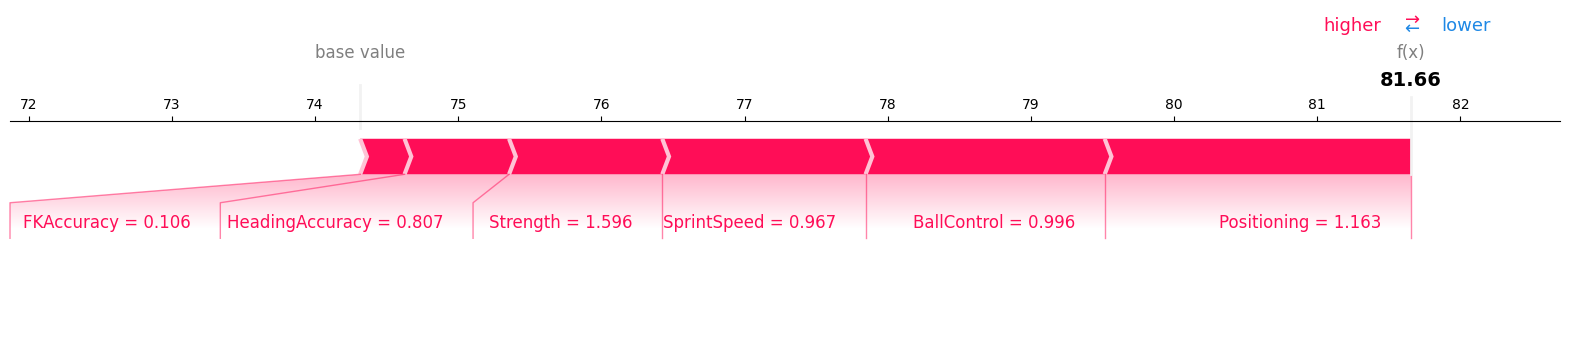

                (259399, R. Højlund, 2024)  shap
FKAccuracy                            48.0  0.31
HeadingAccuracy                       70.0  0.73
BallControl                           76.0  1.67
SprintSpeed                           85.0  1.42
Strength                              84.0  1.07
Positioning                           77.0  2.14


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


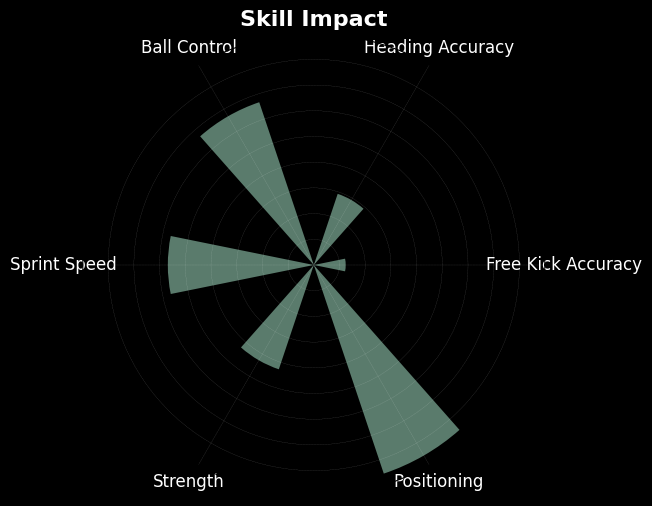

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [80.55356088]
[(240833, 'Y. Moukoko', 2024)]


100%|██████████| 1/1 [00:00<00:00, 30.85it/s]


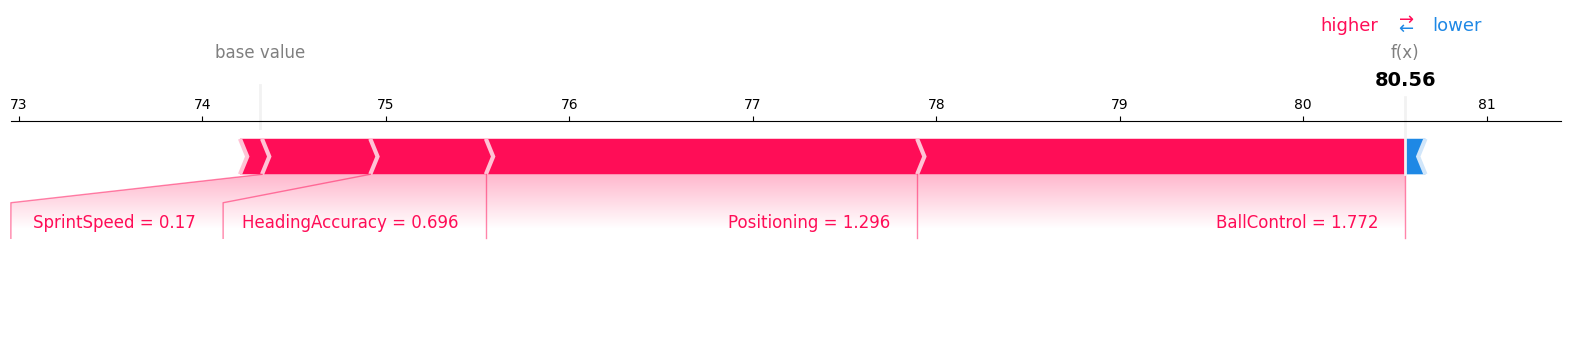

                (240833, Y. Moukoko, 2024)  shap
FKAccuracy                            42.0 -0.11
HeadingAccuracy                       69.0  0.63
BallControl                           81.0  2.66
SprintSpeed                           79.0  0.59
Strength                              68.0  0.12
Positioning                           78.0  2.35


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


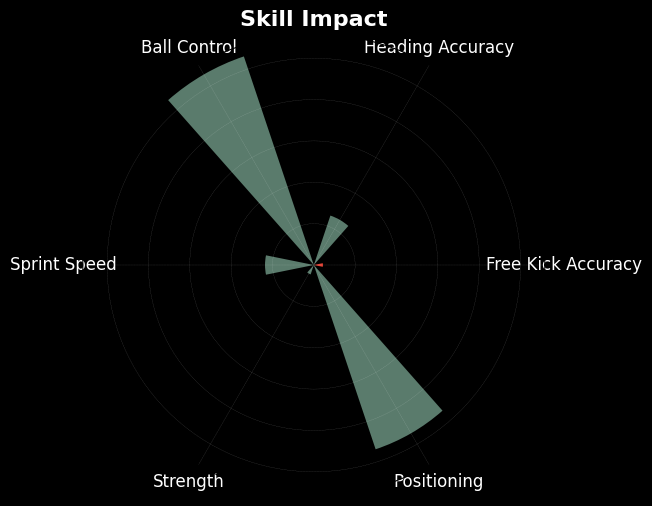

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.66691952]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:00<00:00, 26.06it/s]


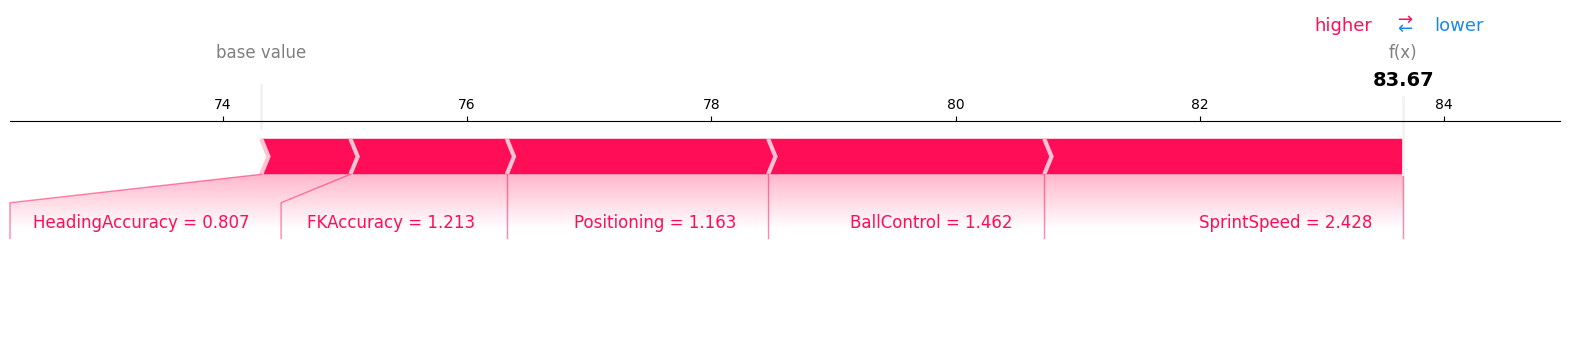

                (251852, K. Adeyemi, 2024)  shap
FKAccuracy                            62.0  1.28
HeadingAccuracy                       70.0  0.73
BallControl                           79.0  2.26
SprintSpeed                           96.0  2.94
Strength                              66.0  0.00
Positioning                           77.0  2.14


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


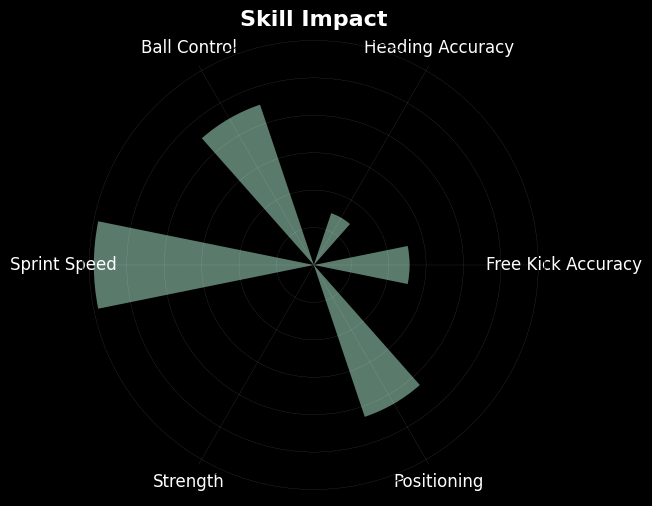

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [78.10981182]
[(256658, 'J. Ngankam', 2024)]


100%|██████████| 1/1 [00:00<00:00, 33.81it/s]


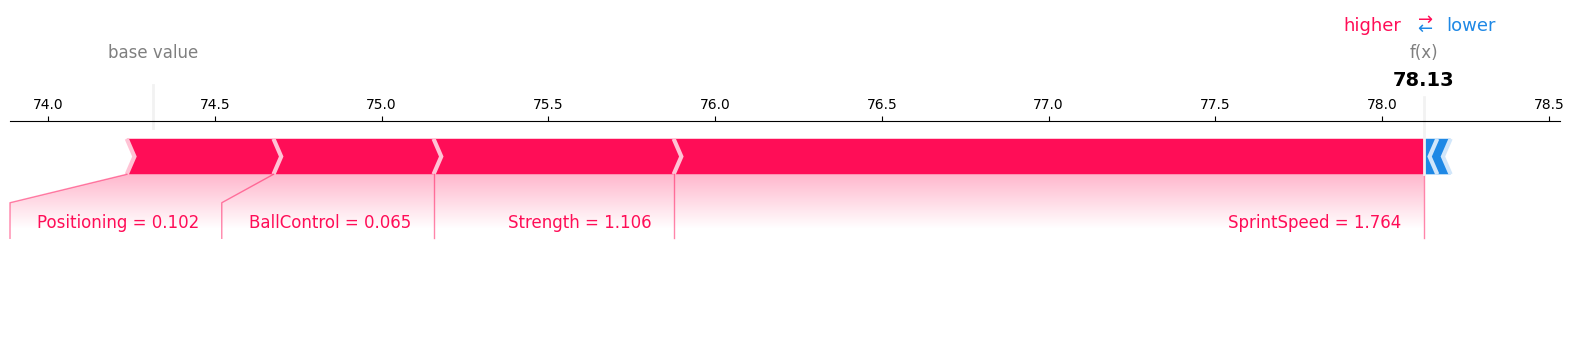

                (256658, J. Ngankam, 2024)  shap
FKAccuracy                            43.0 -0.04
HeadingAccuracy                       62.0 -0.04
BallControl                           70.0  0.48
SprintSpeed                           91.0  2.25
Strength                              78.0  0.72
Positioning                           69.0  0.44


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


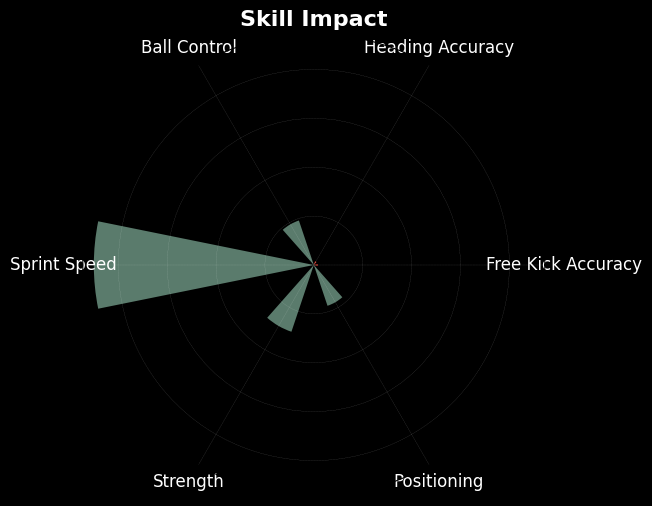

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [81.53965057]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:00<00:00, 41.79it/s]


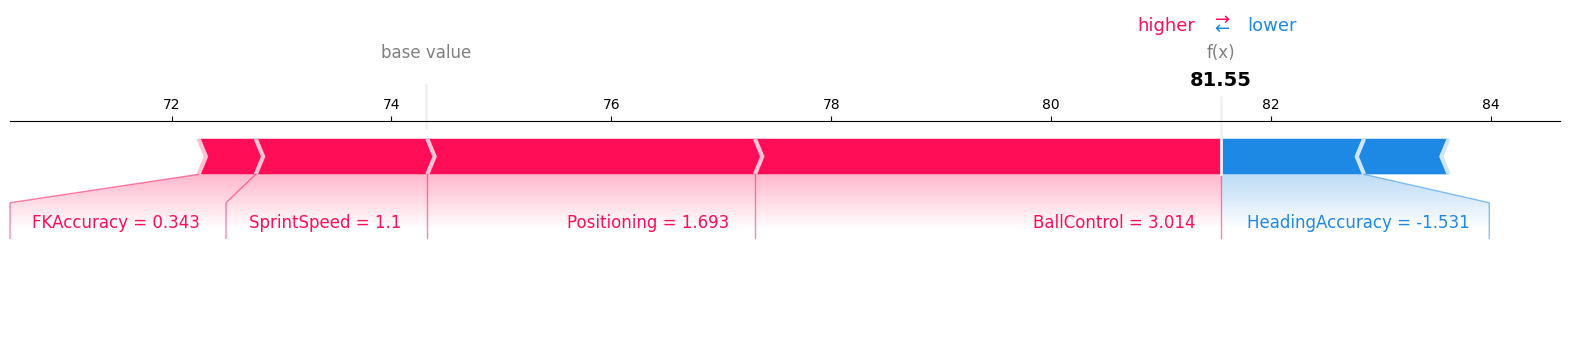

                (256790, J. Musiala, 2024)  shap
FKAccuracy                            51.0  0.52
HeadingAccuracy                       49.0 -1.30
BallControl                           89.0  4.24
SprintSpeed                           86.0  1.56
Strength                              53.0 -0.77
Positioning                           81.0  2.98


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


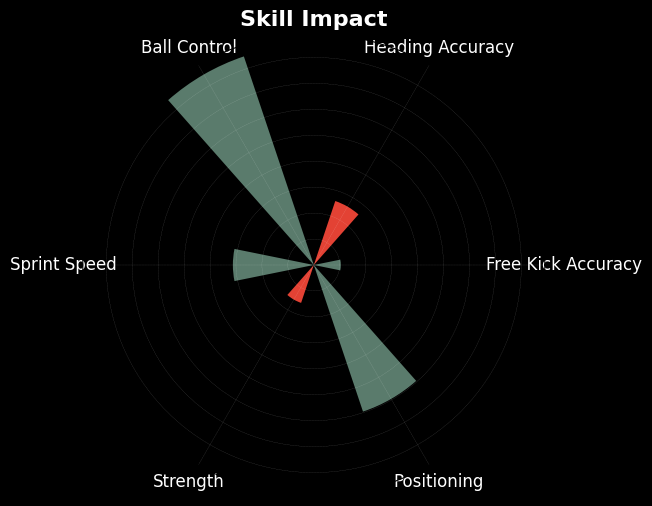

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [22]:
from config import plot_feature_mapping

for ID in [259399,240833,251852,256658,256790]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        27
        True       0.67      0.67      0.67         3

    accuracy                           0.93        30
   macro avg       0.81      0.81      0.81        30
weighted avg       0.93      0.93      0.93        30

pred [86.8005595]
[(256630, 'F. Wirtz', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


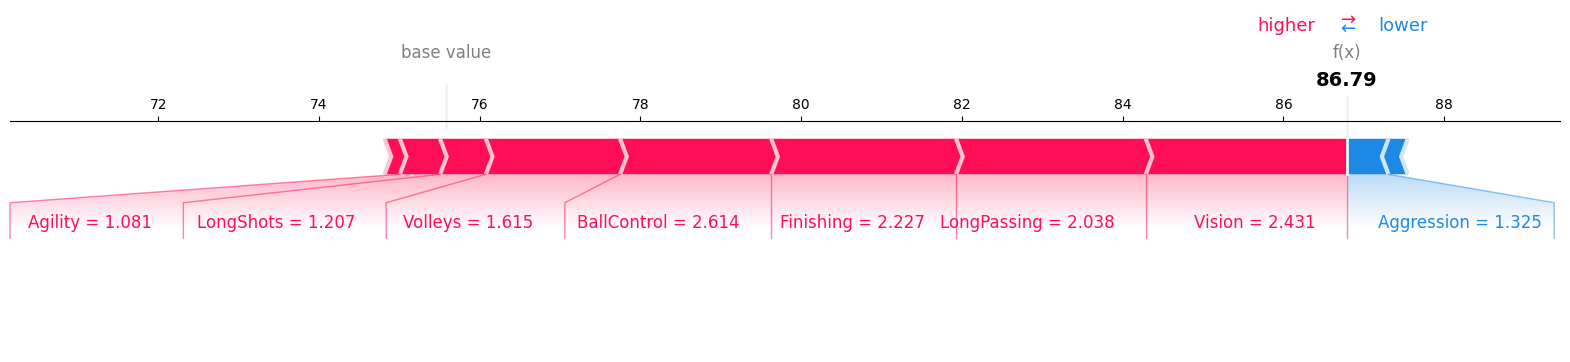

            (256630, F. Wirtz, 2024)  shap
Finishing                       78.0  2.30
Volleys                         73.0  1.67
LongPassing                     81.0  2.36
BallControl                     89.0  1.88
Agility                         86.0  0.50
Composure                       83.0 -0.24
Jumping                         59.0  0.00
LongShots                       75.0  0.57
Aggression                      63.0 -0.52
Positioning                     80.0  0.19
Vision                          88.0  2.50


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


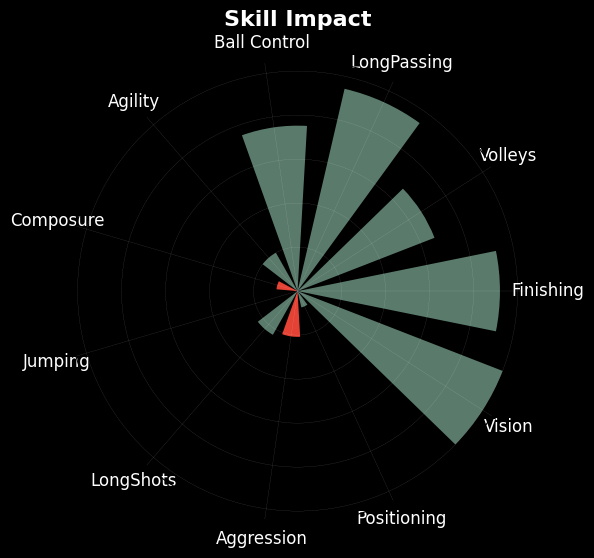

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [86.2016898]
[(256790, 'J. Musiala', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.31it/s]


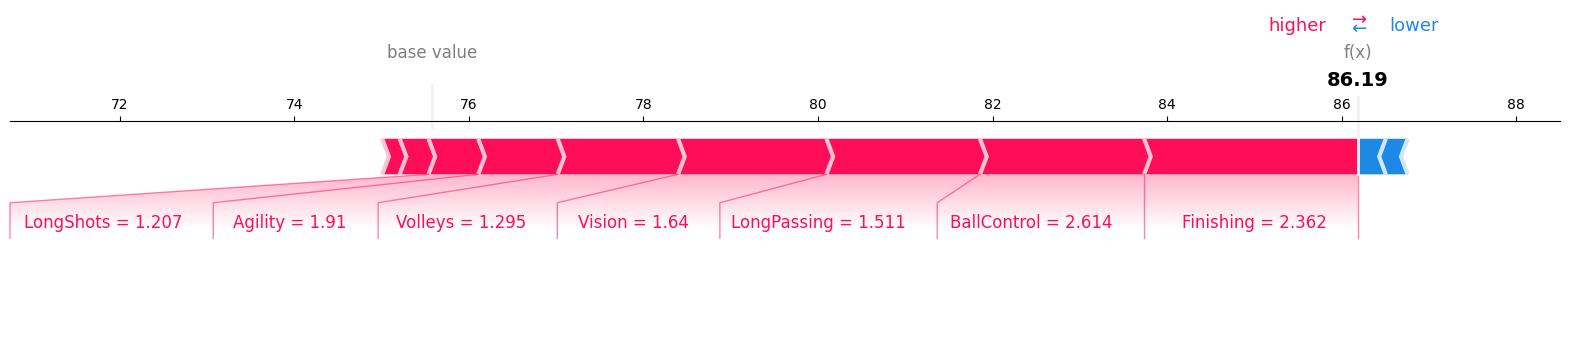

            (256790, J. Musiala, 2024)  shap
Finishing                         79.0  2.45
Volleys                           70.0  1.38
LongPassing                       77.0  1.76
BallControl                       89.0  1.88
Agility                           93.0  0.91
Composure                         84.0 -0.25
Jumping                           65.0  0.33
LongShots                         75.0  0.57
Aggression                        59.0 -0.32
Positioning                       81.0  0.20
Vision                            82.0  1.70


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


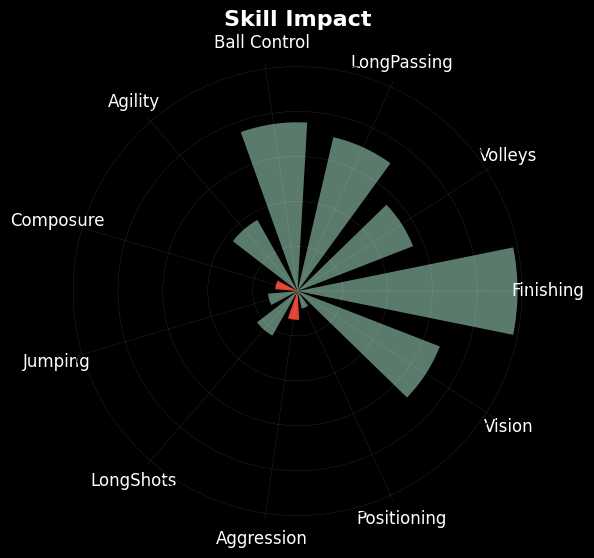

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred [83.16012439]
[(251852, 'K. Adeyemi', 2024)]


100%|██████████| 1/1 [00:00<00:00,  4.38it/s]


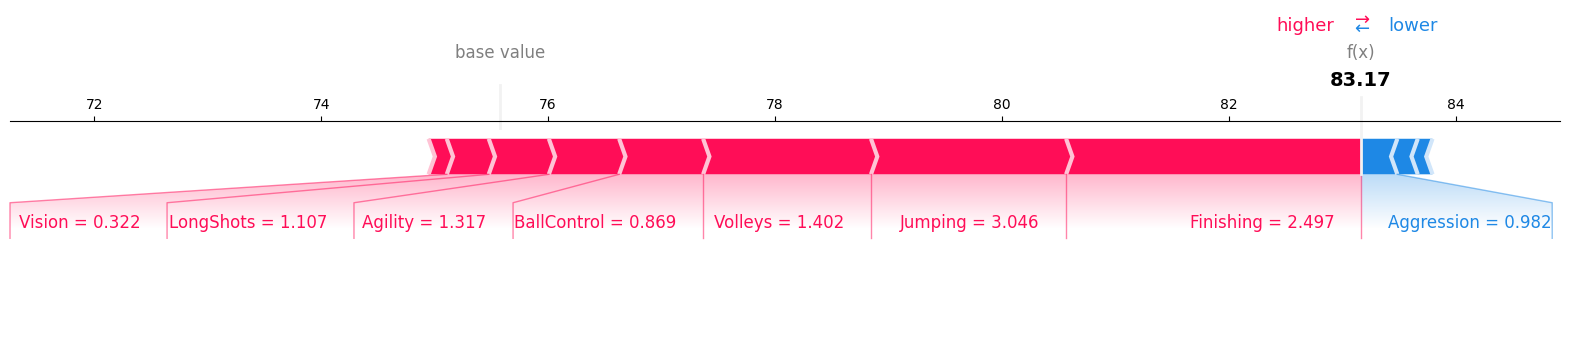

            (251852, K. Adeyemi, 2024)  shap
Finishing                         80.0  2.60
Volleys                           71.0  1.48
LongPassing                       64.0 -0.18
BallControl                       79.0  0.74
Agility                           88.0  0.62
Composure                         76.0 -0.13
Jumping                           90.0  1.72
LongShots                         74.0  0.53
Aggression                        59.0 -0.32
Positioning                       77.0  0.16
Vision                            72.0  0.37


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


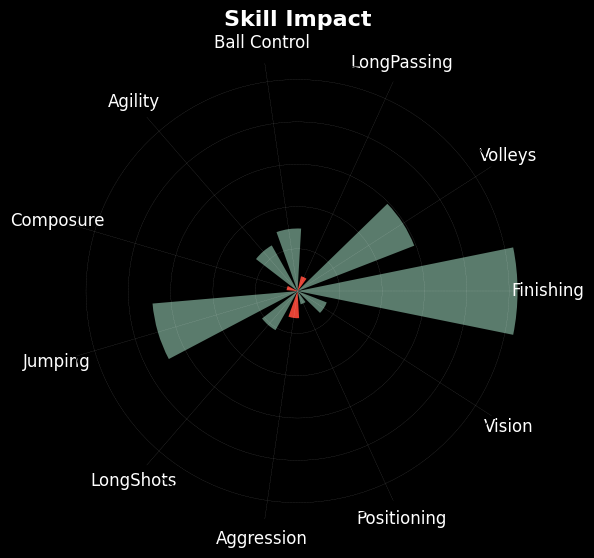

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [15]:
import pickle

with open("./data/sport_analytics/model/offense_potential_attacking_midfielder.pkl", "rb") as file:
    loaded_object = pickle.load(file)

chosen_object = loaded_object[ 'Huber Regression']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']
explainer = chosen_object['explainer']
print(chosen_object['Classification Report'])
# print(chosen_object['AUC'])

from config import plot_feature_mapping

for ID in [256630,256790,251852]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler,explainer= explainer)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)